In [19]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import paddle
from paddle.vision import transforms
import matplotlib.pyplot as plt  # 导入 pyplot 子模块
# 训练完这个章节记得删除目录数据
# C:\Users\11\.cache\paddle\dataset\fashion-mnist\train-images-idx3-ubyte.gz

In [3]:
trans = transforms.ToTensor()
mnist_train = paddle.vision.datasets.FashionMNIST(mode="train",
                                                  transform=trans)
mnist_test = paddle.vision.datasets.FashionMNIST(mode="test", transform=trans)

In [4]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [5]:
mnist_train[0][0].shape

[1, 28, 28]

In [6]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [17]:

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)  # 修改这里
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if paddle.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

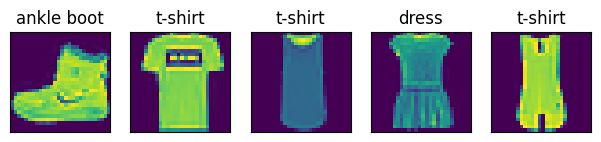

In [28]:
X, y = next(iter(paddle.io.DataLoader(mnist_train, batch_size=5)))
show_images(X.reshape([5, 28, 28]), 1, 5, titles=get_fashion_mnist_labels(y));

In [29]:
batch_size = 256

def get_dataloader_workers():
    """使用4个进程来读取数据"""
    return 4

train_iter = paddle.io.DataLoader(dataset=mnist_train,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  return_list=True,
                                  num_workers=get_dataloader_workers())

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = paddle.vision.datasets.FashionMNIST(mode="train",
                                                      transform=trans)
    mnist_test = paddle.vision.datasets.FashionMNIST(mode="test",
                                                     transform=trans)
    return (paddle.io.DataLoader(dataset=mnist_train,
                                 batch_size=batch_size,
                                 shuffle=True,
                                 return_list=True,
                                 num_workers=get_dataloader_workers()),
            paddle.io.DataLoader(dataset=mnist_test,
                                 batch_size=batch_size,
                                 return_list=True,
                                 shuffle=True,
                                 num_workers=get_dataloader_workers()))